In [122]:
import numpy as np
import matplotlib.pyplot as plt
from Libraries.files import*
from Libraries.fitter import*
from iminuit.cost import LeastSquares
from scipy.stats import chi2

Punto 1

In [123]:
data = np.loadtxt('dati.txt',float)
t = data[:,0]
v = data[:,1]
dv =data[:,2]

Punto 2

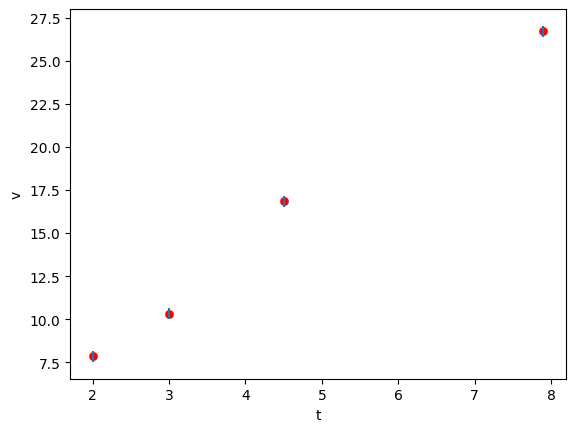

In [124]:
plt.scatter(t,v,c='r',linewidths=.3)
plt.errorbar(t,v,dv,linestyle='None')
plt.xlabel("t")
plt.ylabel("v")
plt.show()

Punto 3

In [125]:
def f(t,a,v0):
    return a*t + v0

In [126]:
cost = LeastSquares(t,v,dv,f)
fitter = fit(cost, a=1,v0=0)
display(fitter)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 14.37 (χ²/ndof = 7.2)      │              Nfcn = 42               │
│ EDM = 6.37e-21 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   3.26    │   0.07    │            │            │         │         │       │
│ 1 │ v0   │   1.26    │   0.35    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬─────────────────┐
│    │       a      v0 │
├────┼─────────────────┤
│  a │ 0.00507  -0.022 │
│ v0 │  -0.022   0.121 │
└────┴─────────────────┘

In [127]:
a1,v1 = fitter.values['a'],fitter.values['v0']
q = fitter.fval
k = fitter.ndof
p = chi2.cdf(q,k)
print("p value: ",p)
print("acc =%f \nvel_in =%f" % (a1,v1))

p value:  0.9992429467720461
acc =3.255103 
vel_in =1.264608


v0 diverso da zero -> Non compatibile con 0

Punto 6

In [128]:
def f_zero(t,a):
    return a*t

In [129]:
cost = LeastSquares(t,v,dv,f_zero)
fit_zero = fit(cost, a=1)
display(fit_zero)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 27.56 (χ²/ndof = 9.2)      │              Nfcn = 20               │
│ EDM = 8.72e-16 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   3.485   │   0.033   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────┐
│   │       a │
├───┼─────────┤
│ a │ 0.00106 │
└───┴─────────┘

In [130]:
a2 = fit_zero.values['a']
q_zero = fit_zero.fval
k_zero = fit_zero.ndof
p_zero = chi2.cdf(q_zero,k_zero)
print("acc =",a2)
print("p value: ",p_zero)

acc = 3.4851276405174563
p value:  0.9999955137955006


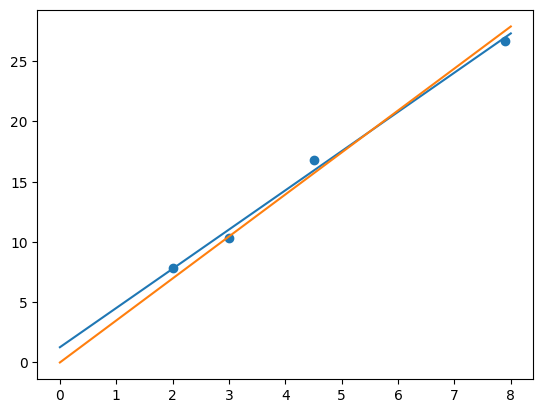

In [131]:
t_ = np.linspace(0,8)
v_no_zero = [f(i,a1,v1) for i in t_]
v_zero = [f_zero(i,a2) for i in t_]
plt.scatter(t,v)
plt.plot(t_,v_no_zero)
plt.plot(t_,v_zero)
plt.show()